<a href="https://colab.research.google.com/github/justmexmehak/DeepLearning/blob/main/HandWrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

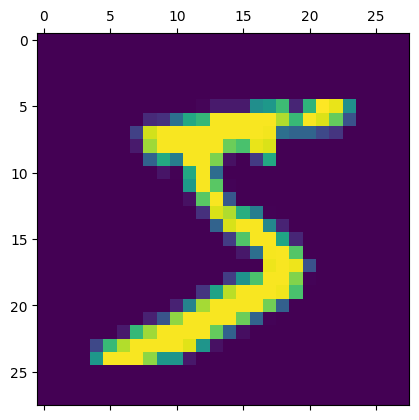

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [16]:
# flatten training data set
# to convert 28 * 28 image into a 1D array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [17]:
len(X_test)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [24]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Creating a simple neural network with just 2 layers, input and ouptut

In a dense layer each neuron is connected to all neurons in the previous layer

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs = 5) # where training actually happens
# epochs is the no. of iterations your neural network is trained

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4651 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9260


In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.9249


[0.26775866746902466, 0.9248999953269958]

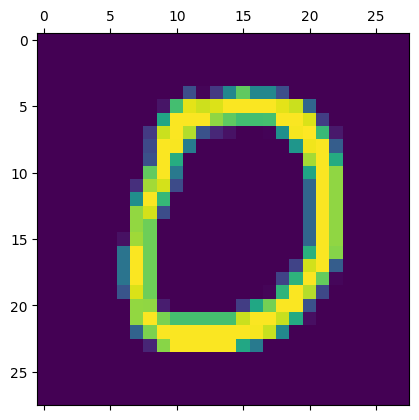

In [33]:
plt.matshow(X_test[10])

In [32]:
y_pred = model.predict(X_test_flattened)
y_pred[10]

313/313 [==============================] - 0s 1ms/step


array([9.9922806e-01, 1.6345952e-07, 4.7448584e-01, 8.7317362e-02,
       1.4760114e-04, 7.8722912e-01, 2.6702546e-02, 3.3561824e-05,
       6.3271362e-01, 4.3924188e-04], dtype=float32)

In [34]:
np.argmax(y_pred[10])

0

In [35]:
y_pred_labels = [np.argmax(x) for x in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
cm = tf.math.confusion_matrix(labels= y_test, predictions=y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

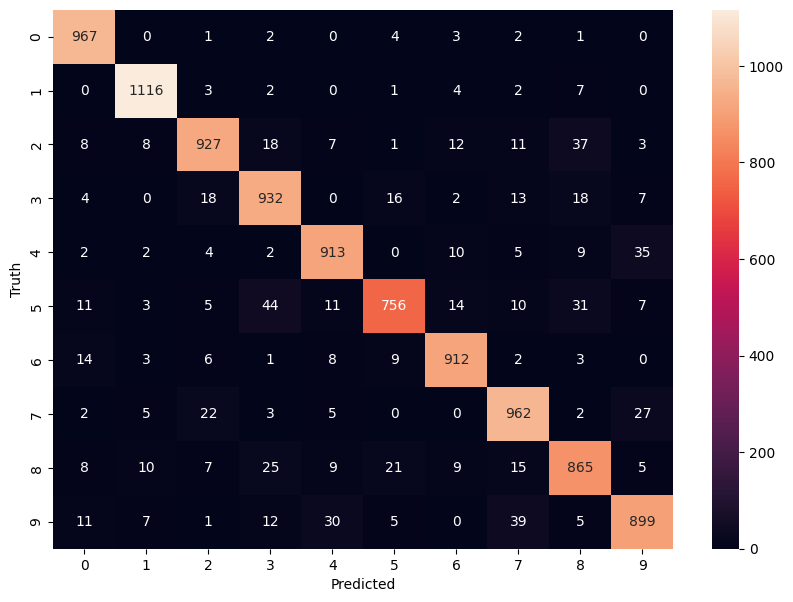

In [38]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784, ), activation='relu'),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2749 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1244 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0870 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0678 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9833


313/313 [==============================] - 2s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

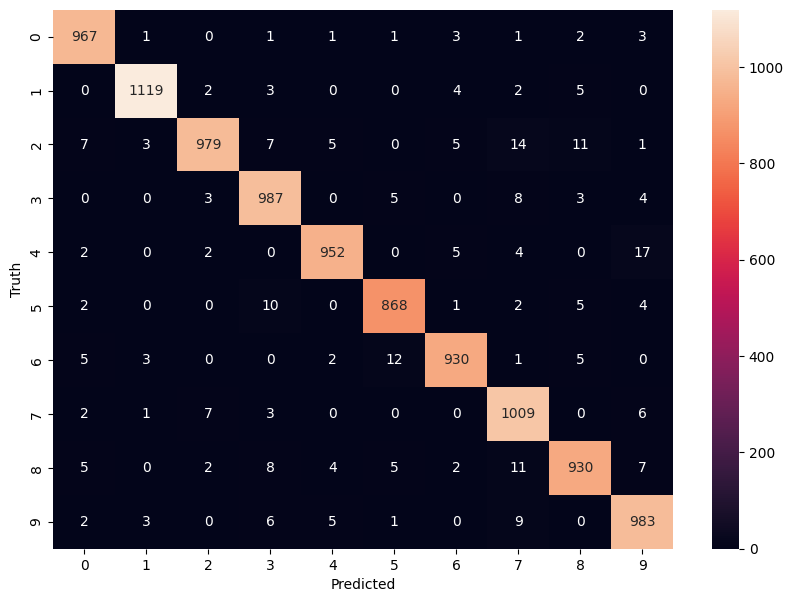

In [40]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(x) for x in y_pred]
cm = tf.math.confusion_matrix(labels= y_test, predictions=y_pred_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
# flattening X_train within neural network itself
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2664 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1184 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0839 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0650 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9841
